# Importing Data and Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('class_marketing_advertising.csv')

In [4]:
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0


# Feature Engineering

### Handling Missing Data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


### Check for Duplicates

In [6]:
df.duplicated().sum()

np.int64(0)

### Dealing With Outliers

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
      dtype=object)

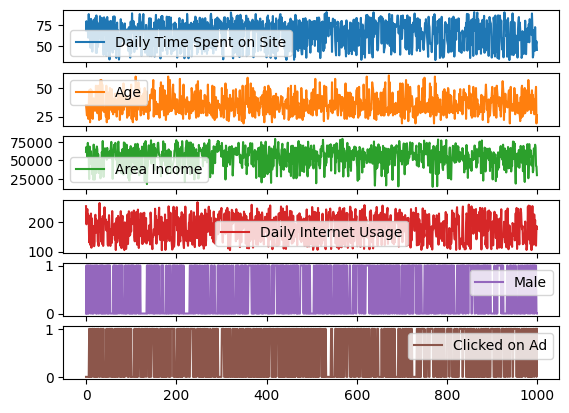

In [7]:
df.plot(subplots = True)

In [8]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


<Axes: xlabel='Area Income'>

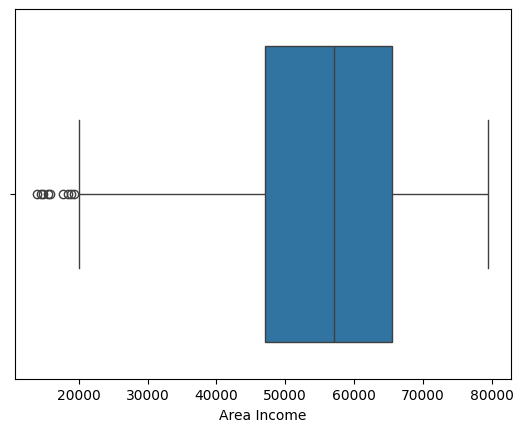

In [9]:
sns.boxplot(data=df,x='Area Income')


In [10]:
q1 = df['Area Income'].quantile(0.25)
q3 = df['Area Income'].quantile(0.75)
IQR = q3 - q1
Min_Outlier = q1 - 1.5 * IQR
Max_Outlier = q3 + 1.5 * IQR

In [11]:
Max_Outlier

np.float64(93128.88375)

In [12]:
Min_Outlier

np.float64(19373.553750000003)

In [13]:
df = df[(df['Area Income'] > Min_Outlier) & (df['Area Income'] < Max_Outlier)]


### Data Validation

In [14]:
df['Age'] = df['Age'].astype('float')

C:\Users\Hesham\AppData\Local\Temp\ipykernel_51192\3779930272.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = df['Age'].astype('float')


In [15]:
df.sample(2)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
245,81.22,53.0,34309.24,223.09,Networked coherent interface,Port Jason,1,San Marino,2016-01-07 13:25:21,0
598,83.53,36.0,67686.16,204.56,Customizable methodical Graphical User Interface,New Dawnland,0,Honduras,2016-07-06 05:34:52,0


In [16]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

C:\Users\Hesham\AppData\Local\Temp\ipykernel_51192\766710655.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Timestamp'] = pd.to_datetime(df['Timestamp'])


In [17]:
df['Month'] = df['Timestamp'].dt.month

C:\Users\Hesham\AppData\Local\Temp\ipykernel_51192\1659950735.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['Timestamp'].dt.month


In [18]:
df['Hour'] = df['Timestamp'].dt.hour

C:\Users\Hesham\AppData\Local\Temp\ipykernel_51192\3937800959.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hour'] = df['Timestamp'].dt.hour


In [19]:
df['Day'] = df['Timestamp'].dt.day

C:\Users\Hesham\AppData\Local\Temp\ipykernel_51192\1841565766.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Day'] = df['Timestamp'].dt.day


In [20]:
df.sample(3)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Month,Hour,Day
687,73.27,28.0,67301.39,216.24,Front-line multi-state hub,West Angela,1,Luxembourg,2016-05-22 15:17:25,0,5,15,22
220,77.88,37.0,55353.41,254.57,Multi-tiered human-resource structure,Melissafurt,0,Poland,2016-07-02 00:24:22,0,7,0,2
381,43.63,41.0,51662.24,123.25,Exclusive zero tolerance frame,Jordanshire,1,Albania,2016-03-15 14:06:17,1,3,14,15


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 991 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Daily Time Spent on Site  991 non-null    float64       
 1   Age                       991 non-null    float64       
 2   Area Income               991 non-null    float64       
 3   Daily Internet Usage      991 non-null    float64       
 4   Ad Topic Line             991 non-null    object        
 5   City                      991 non-null    object        
 6   Male                      991 non-null    int64         
 7   Country                   991 non-null    object        
 8   Timestamp                 991 non-null    datetime64[ns]
 9   Clicked on Ad             991 non-null    int64         
 10  Month                     991 non-null    int32         
 11  Hour                      991 non-null    int32         
 12  Day                       9

In [22]:
df.reset_index(drop=True, inplace=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Daily Time Spent on Site  991 non-null    float64       
 1   Age                       991 non-null    float64       
 2   Area Income               991 non-null    float64       
 3   Daily Internet Usage      991 non-null    float64       
 4   Ad Topic Line             991 non-null    object        
 5   City                      991 non-null    object        
 6   Male                      991 non-null    int64         
 7   Country                   991 non-null    object        
 8   Timestamp                 991 non-null    datetime64[ns]
 9   Clicked on Ad             991 non-null    int64         
 10  Month                     991 non-null    int32         
 11  Hour                      991 non-null    int32         
 12  Day                   

### Encoding

In [24]:
df['Country'].value_counts()

Country
Czech Republic      9
France              9
Senegal             8
Peru                8
Greece              8
                   ..
Kiribati            1
Marshall Islands    1
Bermuda             1
Mozambique          1
Lesotho             1
Name: count, Length: 237, dtype: int64

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
enc = LabelEncoder()

In [27]:
df['Country_Enc'] = enc.fit_transform(df[['Country']])

c:\Users\Hesham\Desktop\Class_Project\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hesham\AppData\Local\Temp\ipykernel_51192\3317146743.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Country_Enc'] = enc.fit_transform(df[['Country']])


In [28]:
df['City_Enc'] = enc.fit_transform(df[['City']])

c:\Users\Hesham\Desktop\Class_Project\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hesham\AppData\Local\Temp\ipykernel_51192\803922978.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['City_Enc'] = enc.fit_transform(df[['City']])


In [29]:
df['Ad_Topic_Enc'] = enc.fit_transform(df[['Ad Topic Line']])

c:\Users\Hesham\Desktop\Class_Project\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hesham\AppData\Local\Temp\ipykernel_51192\2518755360.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Ad_Topic_Enc'] = enc.fit_transform(df[['Ad Topic Line']])


In [30]:
df.sample(3)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Month,Hour,Day,Country_Enc,City_Enc,Ad_Topic_Enc
517,46.61,42.0,65856.74,136.18,Progressive intermediate throughput,Catherinefort,0,Ethiopia,2016-01-01 20:17:49,1,1,20,1,65,72,671
773,75.55,36.0,31998.72,123.71,Decentralized attitude-oriented interface,South Davidmouth,1,Bosnia and Herzegovina,2016-03-12 06:05:12,1,3,6,12,26,778,173
346,37.87,52.0,56394.82,188.56,Phased analyzing emulation,Robertsonburgh,1,Gambia,2016-05-25 20:10:02,1,5,20,25,75,728,589


### Scaling

In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()


In [32]:
df['Daily Time Spent on Site_Sc'] = sc.fit_transform(df[['Daily Time Spent on Site']])

C:\Users\Hesham\AppData\Local\Temp\ipykernel_51192\363017592.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Daily Time Spent on Site_Sc'] = sc.fit_transform(df[['Daily Time Spent on Site']])


In [33]:
df[[
    'Age_Sc',
    'Area Income_Sc',
    'Daily Internet Usage_Sc',
    'Daily Time Spent on Site_Sc',
    'Month_Sc',
    'Hour_Sc',
    'Day_Sc'
]] = sc.fit_transform(df[['Age','Area Income','Daily Internet Usage',
                          'Daily Time Spent on Site',
                          'Month','Hour','Day']])

C:\Users\Hesham\AppData\Local\Temp\ipykernel_51192\1261960045.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[[
C:\Users\Hesham\AppData\Local\Temp\ipykernel_51192\1261960045.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[[
C:\Users\Hesham\AppData\Local\Temp\ipykernel_51192\1261960045.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

In [34]:
df.sample(3)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,...,Country_Enc,City_Enc,Ad_Topic_Enc,Daily Time Spent on Site_Sc,Age_Sc,Area Income_Sc,Daily Internet Usage_Sc,Month_Sc,Hour_Sc,Day_Sc
186,77.95,31.0,62572.88,233.65,Inverse asymmetric instruction set,Port Mathew,1,Bahamas,2016-06-02 21:02:22,0,...,15,679,418,0.811271,-0.566559,0.557607,1.218792,1.138905,1.340898,-1.542230
46,69.62,20.0,50983.75,202.25,Business-focused encompassing neural-net,New Sharon,1,Qatar,2016-02-26 22:46:43,0,...,171,521,68,0.287124,-1.816520,-0.336964,0.505668,-0.937737,1.484369,1.206189
941,78.96,50.0,69868.48,193.15,Stand-alone well-modulated product,East Jason,0,Cayman Islands,2016-02-12 01:55:38,1,...,39,154,820,0.874823,1.592465,1.120759,0.298999,-0.937737,-1.528525,-0.397055


### Model Building

In [35]:
X = df.drop(columns=['Clicked on Ad','Timestamp','Country','City','Ad Topic Line',
                     'Daily Time Spent on Site','Age','Area Income','Daily Internet Usage',
                     'Month','Hour','Day'  ])
y = df['Clicked on Ad']

In [36]:
X

,Male,Country_Enc,City_Enc,Ad_Topic_Enc,Daily Time Spent on Site_Sc,Age_Sc,Area Income_Sc,Daily Internet Usage_Sc,Month_Sc,Hour_Sc,Day_Sc
0,0,215,952,90,0.244966,-0.112028,0.500565,1.728426,-0.418577,-1.671996,1.320706
1,1,147,895,460,0.954736,-0.566559,1.010636,0.313079,0.100584,-1.528525,-1.313195
2,0,184,111,561,0.277685,-1.134723,0.342482,1.283518,-0.418577,1.197426,-0.282538
3,1,103,931,894,0.572164,-0.793825,-0.041908,1.496774,-1.456898,-1.385054,-0.626090
4,0,96,797,760,0.208470,-0.112028,1.431181,1.035515,1.138905,-1.241583,-1.427712
...,...,...,...,...,...,...,...,...,...,...,...
986,1,116,126,342,0.497915,-0.680192,1.237787,0.649429,-0.937737,1.340898,-0.511573
987,1,26,484,356,-0.865623,1.024301,0.959715,-1.034815,0.100584,-1.385054,0.748119
988,1,140,790,260,-0.844859,1.706098,-0.998335,-1.353904,-0.937737,0.767013,-1.656747
989,0,85,927,635,-0.598201,-1.930153,-1.036539,0.180902,-0.418577,-1.385054,0.977154


In [37]:
y

0      0
1      0
2      0
3      0
4      0
      ..
986    1
987    1
988    1
989    0
990    1
Name: Clicked on Ad, Length: 991, dtype: int64

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [39]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=200,max_depth=5)
rf_model.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",5
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(y_

In [40]:
y_pred = rf_model.predict(X_test)

In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_test,y_pred)

0.9748743718592965

### Model Deployment  

In [42]:
import joblib

In [43]:
joblib.dump(rf_model,'rf_model.pkl')

['rf_model.pkl']

In [44]:
Adv_Model = joblib.load('rf_model.pkl')